# Tittle: Heart Disease Prediction

- Auther: Muhammad Tayyab Ali
- Date: 04.Jan.2024
- Dataset: Heart Disease UCI

## Meta-Data (About Dataset)
## Context
This is a multivariate type of dataset which means providing or involving a variety of separate mathematical or statistical variables, multivariate numerical data analysis. It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. This database includes 76 attributes, but all published studies relate to the use of a subset of 14 of them. The Cleveland database is the only one used by ML researchers to date. One of the major tasks on this dataset is to predict based on the given attributes of a patient that whether that particular person has heart disease or not and other is the experimental task to diagnose and find out various insights from this dataset which could help in understanding the problem more.

### Content
#### Column Descriptions:
* `id` (Unique id for each patient)
* `age` (Age of the patient in years)
* `origin` (place of study)
* `sex` (Male/Female)
* `cp` chest pain type 
1. typical angina 
2. atypical angina 
3. non-anginal
4. asymptomatic
* `trestbps` resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* `chol` (serum cholesterol in mg/dl)
* `fbs` (if fasting blood sugar > 120 mg/dl)
* `restecg` (resting electrocardiographic results)
* -- `Values`: [normal, stt abnormality, lv hypertrophy]
* `thalach`: maximum heart rate achieved
* `exang`: exercise-induced angina (True/ False)
* `oldpeak`: ST depression induced by exercise relative to rest
* `slope`: the slope of the peak exercise ST segment
* `ca`: number of major vessels (0-3) colored by fluoroscopy
* `thal`: [normal; fixed defect; reversible defect]
* `num`: the predicted attribute
### Acknowledgements
#### Creators:
* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
#### Relevant Papers:
* Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). International application of a new probability algorithm for the diagnosis of coronary artery disease. American Journal of Cardiology, 64,304--310.
* David W. Aha & Dennis Kibler. "Instance-based prediction of heart-disease presence with the Cleveland database." 
* Gennari, J.H., Langley, P, & Fisher, D. (1989). Models of incremental concept formation. Artificial Intelligence, 40, 11--61.
### Citation Request:
The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution. 

**They would be:**

* Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
* University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
* University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
* V.A. Medical Center, Long Beach and Cleveland Clinic Foundation:Robert Detrano, M.D., Ph.D.

# Aims and Objective:

We will fill this after doing some exploratory Data Analysis (EDA).

### Import Libraries

Let's start the project by impoprting all the libraries that we will need in this project.

In [2]:
# import libraries

# 1. to handle the data
import pandas as pd
import numpy as np

# to visualize the dataset
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
#metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error, mean_squared_error, r2_score

# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

## Load the dataset

In [3]:
# way-1 load the data from csv file placed locally in our pc

df = pd.read_csv('heart_disease_uci.csv')

# print the first 5 rows of the fataframe 
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


## Exploratory Data Analysis (EDA)

### Explore each Column 

In [4]:
# exploring the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [5]:
# Data shape 
df.shape

(920, 16)

In [6]:
# id column
df['id'].min(), df['id'].max()

(1, 920)

In [7]:
# age column 
df['age'].min(), df['age'].max()

(28, 77)

In [8]:
# Let's summarie the age column
df['age'].describe()

count    920.000000
mean      53.510870
std        9.424685
min       28.000000
25%       47.000000
50%       54.000000
75%       60.000000
max       77.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

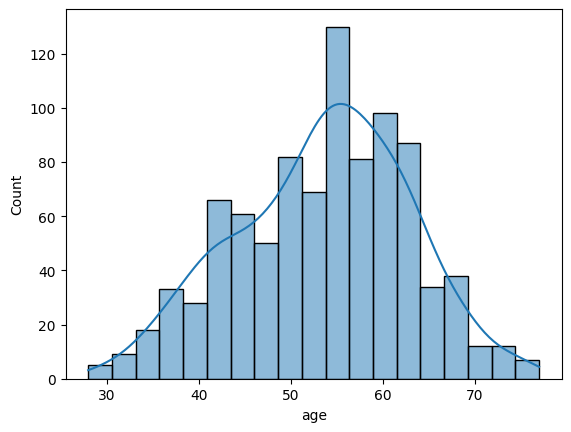

In [9]:
# draw a histogram to see the distribution of age column
sns.histplot(df['age'], kde=True)

Mean:  53.51086956521739
Median:  54.0
Mode:  54


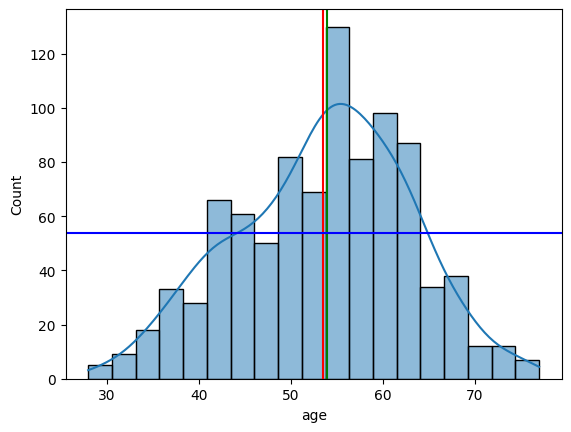

In [10]:
# plot the mean, median and mode of age column using sns
sns.histplot(df['age'], kde=True)
plt.axvline(df['age'].mean(), color='red')
plt.axvline(df['age'].median(), color='green')
plt.axhline(df['age'].mode()[0], color='blue')

# print the value of mean, median and mode of age column
print("Mean: ", df['age'].mean())
print("Median: ", df['age'].median())
print("Mode: ", df['age'].mode()[0])

Let's explore the gender based distribution of the dataset for age column.

In [11]:
# plot the histogram of age column using plotly and coloring this by sex

fig = px.histogram(data_frame=df, x='age', color='sex')
fig.show()

In [12]:
# find the values of sex column
df['sex'].value_counts()

sex
Male      726
Female    194
Name: count, dtype: int64

In [13]:
# calculate the percentages of male and female values counts in the data
male_count = 726
female_count = 194
total_count = male_count + female_count

# calculate percectages
male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100

# display the results 
print(f"Male percentage on the data: {male_percentage:2f}%")
print(f"Female percentage on the data: {female_percentage:2f}%")

# difference 
difference_percentage = ((male_count - female_count)/ female_count)* 100
print(f"Males are: {difference_percentage:.2f}% more than females in the data.")

Male percentage on the data: 78.913043%
Female percentage on the data: 21.086957%
Males are: 274.23% more than females in the data.


In [14]:
# find the value count of age column grouping by sex column

df.groupby('sex')['age'].value_counts().sum()

920

In [15]:
# let's deal with dataset column 
# find the unique values in dataset column 
df['dataset'].unique()

array(['Cleveland', 'Hungary', 'Switzerland', 'VA Long Beach'],
      dtype=object)

In [16]:
# find unique values count in dataset column
df['dataset'].value_counts()

dataset
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64

sex     dataset      
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64


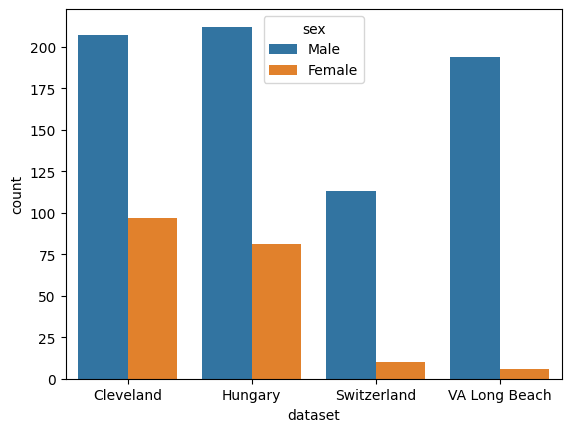

In [17]:
# plot the countplot of dataset column 
sns.countplot(data=df, x='dataset', hue='sex')

# better plots with plotly
fig =px.bar(df, x='dataset', color='sex')
fig.show()

# print the values count of dataset column grouped by sex
print(df.groupby('sex')['dataset'].value_counts())

In [18]:
# make a plot of age column using plotly and coloring this by dataset column 
fig = px.histogram(data_frame=df, x='age', color='dataset')
fig.show()

# print the mean median and mode of age column grouped by dataset column
print(f"Mean of Data Set: {df.groupby('dataset')['age'].mean()}")
print("-----------------------------------------")
print(f"Median of Data Set: {df.groupby('dataset')['age'].median()}")
print("-----------------------------------------")
print(F"Mode of Data Set: {df.groupby('dataset')['age'].agg(pd.Series.mode)}")
print("-----------------------------------------")

Mean of Data Set: dataset
Cleveland        54.351974
Hungary          47.894198
Switzerland      55.317073
VA Long Beach    59.350000
Name: age, dtype: float64
-----------------------------------------
Median of Data Set: dataset
Cleveland        55.5
Hungary          49.0
Switzerland      56.0
VA Long Beach    60.0
Name: age, dtype: float64
-----------------------------------------
Mode of Data Set: dataset
Cleveland              58
Hungary                54
Switzerland            61
VA Long Beach    [62, 63]
Name: age, dtype: object
-----------------------------------------


#### Let's explore cp (Chest Pain) column:

In [19]:
# value count of cp column 
df['cp'] .value_counts()

cp
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64

<Axes: xlabel='cp', ylabel='count'>

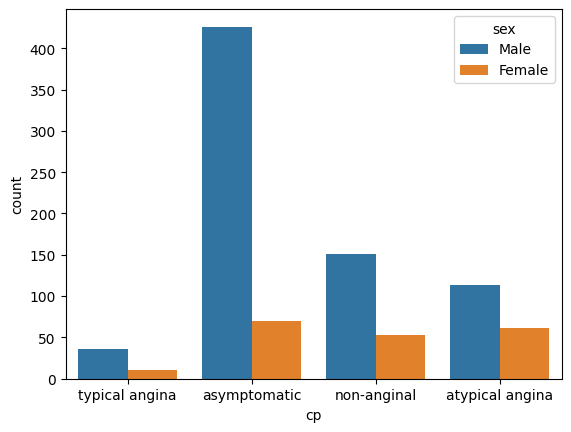

In [20]:
# count plot of cp column by sex column 
sns.countplot(df, x='cp', hue='sex')

<Axes: xlabel='cp', ylabel='count'>

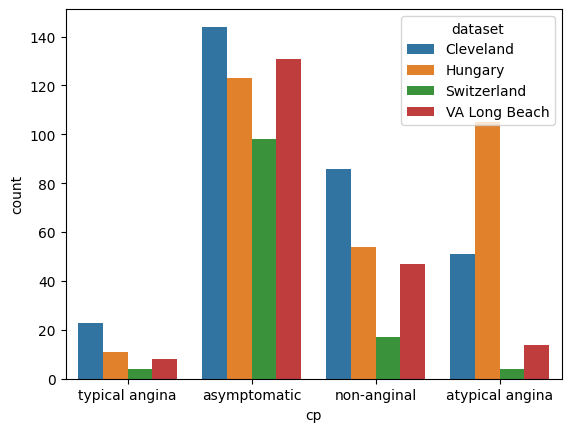

In [21]:
# count plot of cp column by sex column 
sns.countplot(df, x='cp', hue='dataset')

In [22]:
# draw the plot of age column grouped by cp column using plotly 
fig = px.histogram(data_frame=df, x='age', color='cp')
fig.show()


#### Let's explore the tretbps (resting blood pressure) column:

The normal resting blood pressure is 120/80 mm Hg.

`Write here, what will happen if the blood pressure is high of low and than you can bin the data based on those values`

In [23]:
# find the value counts of trestbs column 
df['trestbps'].describe()

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

<Axes: xlabel='trestbps', ylabel='Count'>

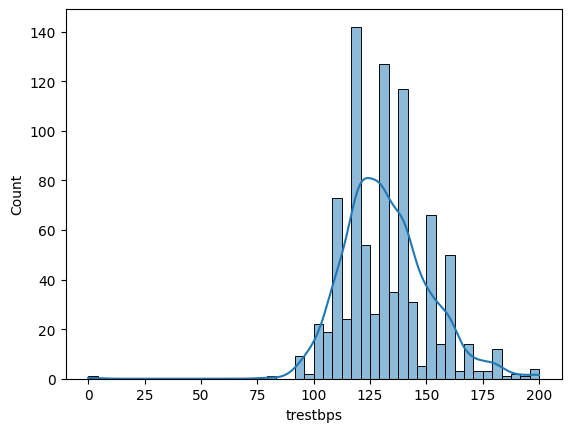

In [24]:
# create a histplot of trestbps column
sns.histplot(df['trestbps'], kde=True)

----

<span style="color: yellow; font-size: 350%; font-weight: bold;">Dealing with missing values:</span>

we are going to make a function to deal with missing values.

In [25]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
missing_data_cols

['trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalch',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal']

In [26]:
categorical_cols = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numeric_cols = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

In [27]:
# define the function to impute the missing values in thal column

def impute_categorical_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    if passed_col in bool_cols:
        y = label_encoder.fit_transform(y)
        
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_classifier = RandomForestClassifier()

    rf_classifier.fit(X_train, y_train)

    y_pred = rf_classifier.predict(X_test)

    acc_score = accuracy_score(y_test, y_pred)

    print("The feature '"+ passed_col+ "' has been imputed with", round((acc_score * 100), 2), "accuracy\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_classifier.predict(X)
        if passed_col in bool_cols:
            df_null[passed_col] = df_null[passed_col].map({0: False, 1: True})
        else:
            pass
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

def impute_continuous_missing_data(passed_col):
    
    df_null = df[df[passed_col].isnull()]
    df_not_null = df[df[passed_col].notnull()]

    X = df_not_null.drop(passed_col, axis=1)
    y = df_not_null[passed_col]
    
    other_missing_cols = [col for col in missing_data_cols if col != passed_col]
    
    label_encoder = LabelEncoder()

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])
    
    iterative_imputer = IterativeImputer(estimator=RandomForestRegressor(random_state=42), add_indicator=True)

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    rf_regressor = RandomForestRegressor()

    rf_regressor.fit(X_train, y_train)

    y_pred = rf_regressor.predict(X_test)

    print("MAE =", mean_absolute_error(y_test, y_pred), "\n")
    print("RMSE =", mean_squared_error(y_test, y_pred, squared=False), "\n")
    print("R2 =", r2_score(y_test, y_pred), "\n")

    X = df_null.drop(passed_col, axis=1)

    for col in X.columns:
        if X[col].dtype == 'object' or X[col].dtype == 'category':
            X[col] = label_encoder.fit_transform(X[col])

    for col in other_missing_cols:
        if X[col].isnull().sum() > 0:
            col_with_missing_values = X[col].values.reshape(-1, 1)
            imputed_values = iterative_imputer.fit_transform(col_with_missing_values)
            X[col] = imputed_values[:, 0]
        else:
            pass
                
    if len(df_null) > 0: 
        df_null[passed_col] = rf_regressor.predict(X)
    else:
        pass

    df_combined = pd.concat([df_not_null, df_null])
    
    return df_combined[passed_col]

In [28]:
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)

ca          611
thal        486
slope       309
fbs          90
oldpeak      62
trestbps     59
thalch       55
exang        55
chol         30
restecg       2
dtype: int64

In [29]:
# remove warning
import warnings
warnings.filterwarnings('ignore')

# impute missing values using our functions
for col in missing_data_cols:
    print("Missing Values", col, ":", str(round((df[col].isnull().sum() / len(df)) * 100, 2))+"%")
    if col in categorical_cols:
        df[col] = impute_categorical_missing_data(col)
    elif col in numeric_cols:
        df[col] = impute_continuous_missing_data(col)
    else:
        pass

Missing Values trestbps : 6.41%


MAE = 13.414104046242777 

RMSE = 17.262196659927483 

R2 = 0.06959953834398891 

Missing Values chol : 3.26%
MAE = 45.008988764044936 

RMSE = 63.835171744778705 

R2 = 0.6771961484924084 

Missing Values fbs : 9.78%
The feature 'fbs' has been imputed with 78.92 accuracy

Missing Values restecg : 0.22%
The feature 'restecg' has been imputed with 63.04 accuracy

Missing Values thalch : 5.98%
MAE = 16.532138728323698 

RMSE = 21.658137425988546 

R2 = 0.3179259548127883 

Missing Values exang : 5.98%
The feature 'exang' has been imputed with 78.03 accuracy

Missing Values oldpeak : 6.74%
MAE = 0.5654186046511629 

RMSE = 0.7883864446110878 

R2 = 0.4078438518813359 

Missing Values slope : 33.59%
The feature 'slope' has been imputed with 68.29 accuracy

Missing Values ca : 66.41%
The feature 'ca' has been imputed with 64.52 accuracy

Missing Values thal : 52.83%
The feature 'thal' has been imputed with 71.26 accuracy



In [30]:
df.isnull().sum()

id          0
age         0
sex         0
dataset     0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [31]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


----

<span style="color: yellow; font-size: 350%; font-weight: bold;">Dealing with Outliers:</span>

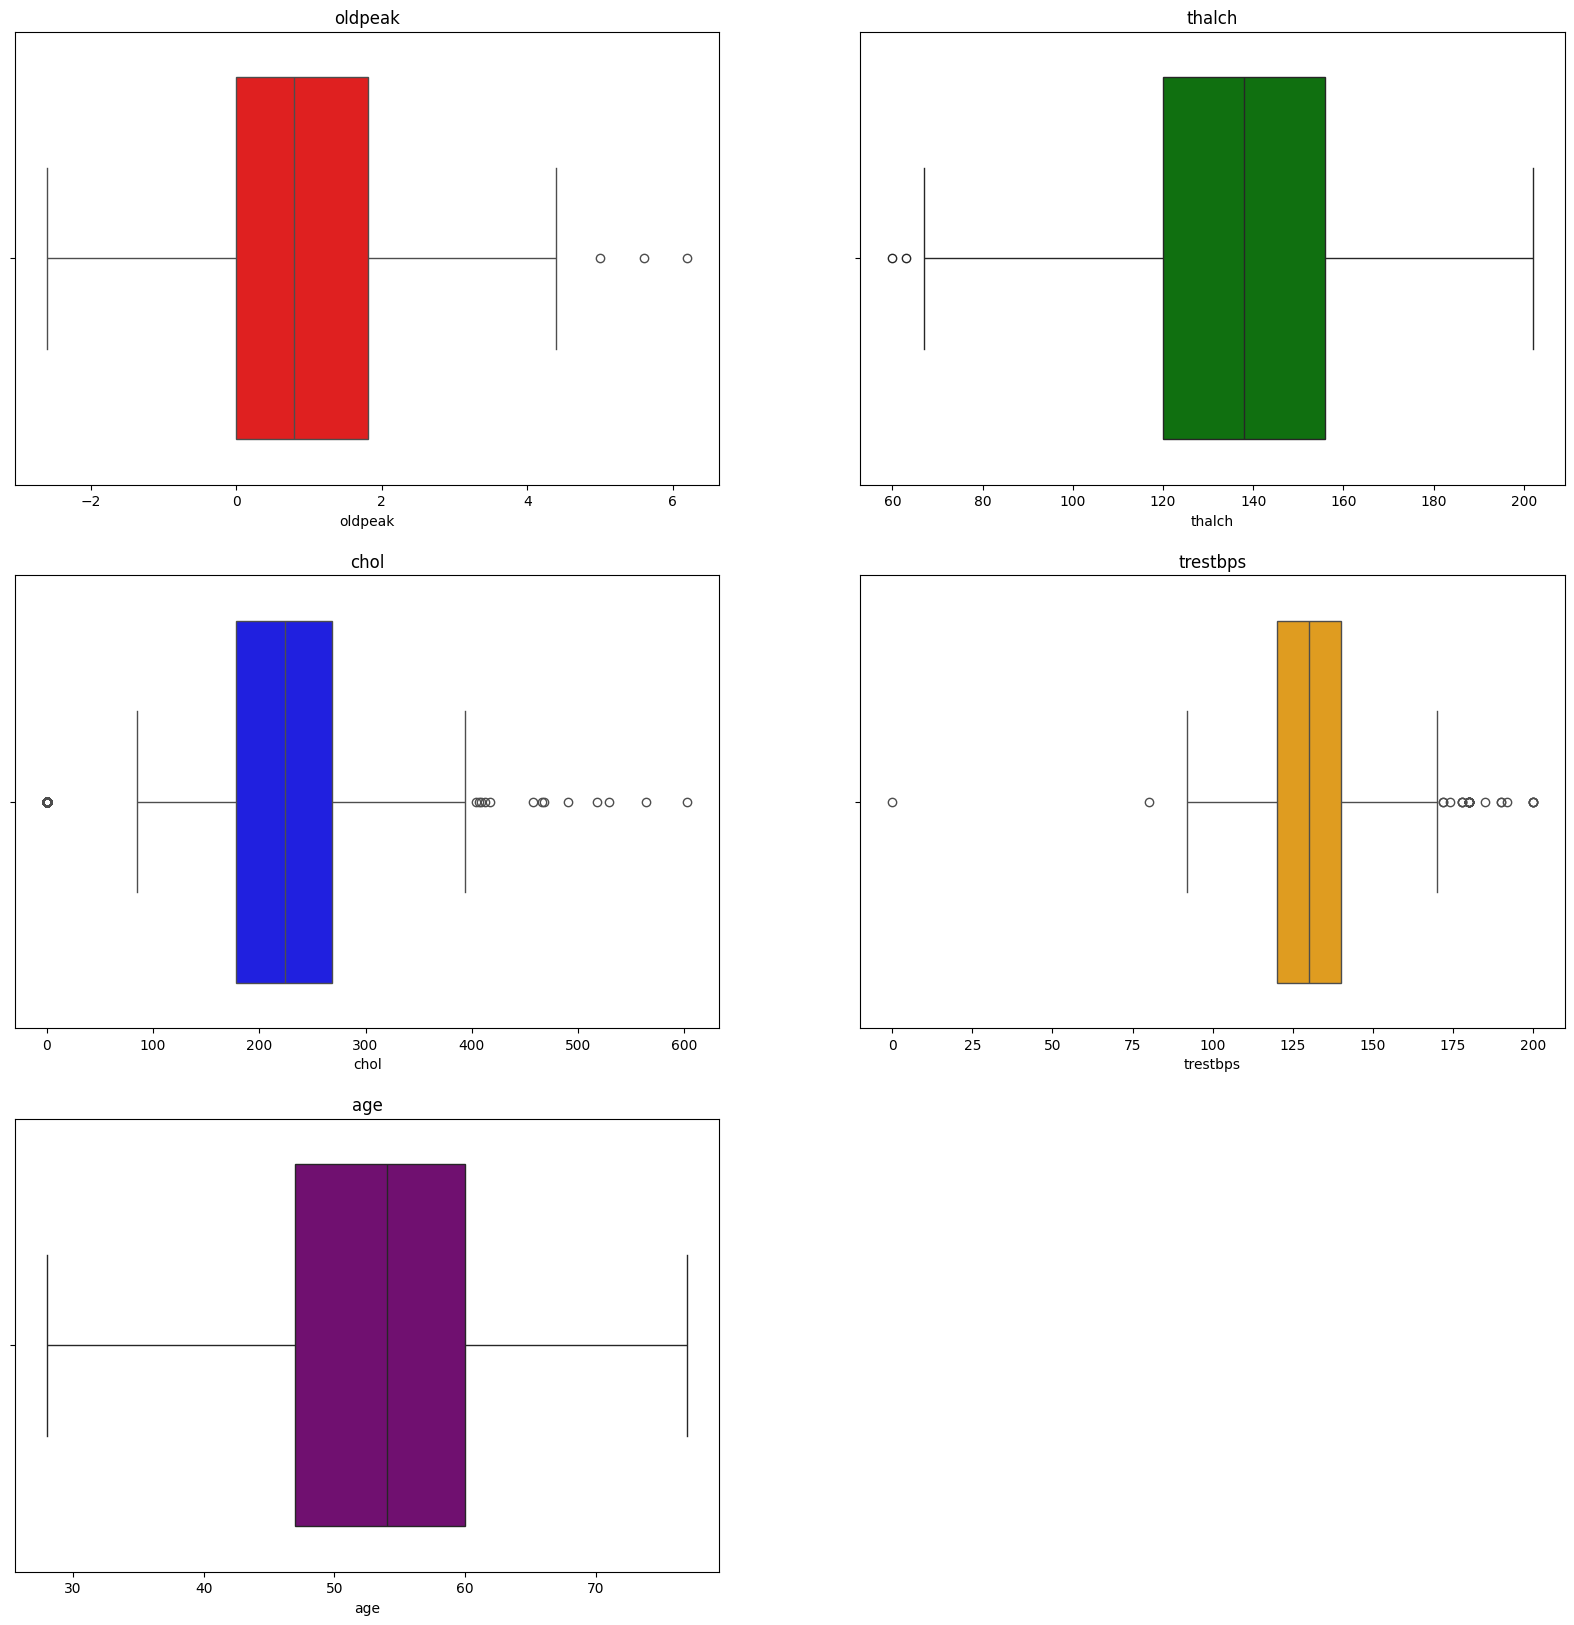

In [32]:
# create box plot for all numeric columns using for loop and subplot 
plt.figure(figsize=(20, 20))

colors = ['red', 'green', 'blue', 'orange', 'purple']

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[col], color=colors[i])
    plt.title(col)

plt.show()

In [33]:
# make box plots of all the numeric columns using for loop and plotly
fig = px.box(data_frame=df, y='age')
fig.show()

fig = px.box(data_frame=df, y='trestbps')
fig.show()

fig = px.box(data_frame=df, y='chol')
fig.show()

fig = px.box(data_frame=df, y='thalch')
fig.show()

fig = px.box(data_frame=df, y='oldpeak')
fig.show()



In [34]:
# print the row from df where threstbp value is 0
df[df['trestbps'] == 0]

# remove this row from data
df = df[df['trestbps'] != 0]

In [35]:
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [36]:
# print the row from df where chol is 0
df[df['chol'] ==0]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
597,598,32,Male,Switzerland,typical angina,95.00,0.0,False,normal,127.00,False,0.700,upsloping,0.0,reversable defect,1
598,599,34,Male,Switzerland,asymptomatic,115.00,0.0,False,normal,154.00,False,0.200,upsloping,0.0,reversable defect,1
599,600,35,Male,Switzerland,asymptomatic,127.66,0.0,False,normal,130.00,True,1.371,flat,0.0,reversable defect,3
600,601,36,Male,Switzerland,asymptomatic,110.00,0.0,False,normal,125.00,True,1.000,flat,0.0,fixed defect,1
601,602,38,Female,Switzerland,asymptomatic,105.00,0.0,False,normal,166.00,False,2.800,upsloping,0.0,normal,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818,819,43,Male,VA Long Beach,asymptomatic,122.00,0.0,False,normal,120.00,False,0.500,upsloping,0.0,reversable defect,1
819,820,63,Male,VA Long Beach,non-anginal,130.00,0.0,True,st-t abnormality,160.00,False,3.000,flat,0.0,reversable defect,0
822,823,48,Male,VA Long Beach,non-anginal,102.00,0.0,False,st-t abnormality,110.00,True,1.000,downsloping,0.0,reversable defect,1
839,840,56,Male,VA Long Beach,asymptomatic,136.46,0.0,False,lv hypertrophy,117.41,True,2.025,flat,1.0,reversable defect,1


<span style="color: yellow; font-size: 350%; font-weight: bold;">Machine Learning:</span>

In [37]:
df['num'].value_counts()


num
0    411
1    265
2    109
3    106
4     28
Name: count, dtype: int64

The target Column is num which is the predicted attribute. we will use this column to predict the heart disease.
The unique values in this column are: [0, 1, 2, 3, 4], which states that there are 5 type of heart disease.
- 0 = no heart disease
- 1 = mild heart disease
- 2 = moderate heart disease
- 3 = severe heart disease
- 4 = critical heart disease

In [38]:
# split the data into X and y
X = df.drop('num', axis=1)
y = df['num']


# encode X data using separate lable encoder for all categorical columns and save it for inverse transform,
# Task: Separate Encoder for all cat and object columns and inverse transform at the end

label_encoder = LabelEncoder()

for col in X.columns:
    if X[col].dtype =='object' or X[col].dtype == 'category':
        X[col] = label_encoder.fit_transform(X[col])
    else:
        pass


# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Enlist all the models that you will use to predict the heart disease. These models should be classifiers for multi-class classification.

1. logistic regression 
2. KHH
3. NB
4. SVM
5. Decision Tree 
6. Random Forest 
7. XGBoost
8. lightGBM
9. Adaboost
10. GradientBoost

In [39]:
# import all models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
# from lightgbm import LGBMClassifier

# impot pipeline
from sklearn.pipeline import Pipeline

# import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [40]:
# Create a list of models to evaluate
models = [
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42)),
    ('Support Vector Machine', SVC(random_state=42)),
    ('Logistic Regression', LogisticRegression(random_state=42)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Ada Boost', AdaBoostClassifier(random_state=42)),
    ('XG Boost', XGBClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB())
]

best_model = None
best_accuracy = 0.0

# Iterate over the models and evaluate their performance
for name, model in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        # ('imputer', SimpleImputer(strategy='most_frequent')),
        # ('encoder', OneHotEncoder(handle_unknown='ignore')),
        ('model', model)
    ])
    
    # Perform cross-validation
    scores = cross_val_score(pipeline, X_train, y_train, cv=5)
    
    # Calculate mean accuracy
    mean_accuracy = scores.mean()
    
    # Fit the pipeline on the training data
    pipeline.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the performance metrics
    print("Model:", name)
    print("Cross-validation Accuracy:", mean_accuracy)
    print("Test Accuracy:", accuracy)
    print()
    
    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline

# Retrieve the best model
print("Best Model:", best_model)

# save the best model
import pickle
pickle.dump(best_model, open('heart_disease_model.pkl', 'wb'))

Model: Random Forest
Cross-validation Accuracy: 0.6501211240310077
Test Accuracy: 0.6413043478260869

Model: Gradient Boosting
Cross-validation Accuracy: 0.6469355620155038
Test Accuracy: 0.6557971014492754

Model: Support Vector Machine
Cross-validation Accuracy: 0.5770106589147287
Test Accuracy: 0.5869565217391305

Model: Logistic Regression
Cross-validation Accuracy: 0.5069404069767443
Test Accuracy: 0.5072463768115942

Model: K-Nearest Neighbors
Cross-validation Accuracy: 0.5692102713178294
Test Accuracy: 0.6014492753623188

Model: Decision Tree
Cross-validation Accuracy: 0.5972262596899224
Test Accuracy: 0.6123188405797102

Model: Ada Boost
Cross-validation Accuracy: 0.5909762596899225
Test Accuracy: 0.5615942028985508

Model: XG Boost
Cross-validation Accuracy: 0.6392562984496124
Test Accuracy: 0.6268115942028986

Model: Naive Bayes
Cross-validation Accuracy: 0.5755692829457365
Test Accuracy: 0.5434782608695652

Best Model: Pipeline(steps=[('model', GradientBoostingClassifier(ran

### Outputs:

1. The minimum age to have a heart disease starts from 28 yearold.
2. Most of the people get heart disease at the age of 53-54 years.
3. Most of males and females get are with heart disease at the age of 54-55 years.
4. Male percentage on the data: 78.913043%
5. Female percentage on the data: 21.086957%
6. Males are: 274.23% more than females in the data.
7. We have highest number of people from Cleveland (304) and lowest from Switzerland (123).
   1. The hihgest number of females in this dataset are from Cleveland (97) and lowest from VA long Beach(6).
   2. The hihest number of males in this dataset are from Hungary (212) and lowest Switzerland (113)
8. Write down the observation here about mean, median and mode of age column, grouped by dataset by dataset column.
9. Write down the observation from cp column here.
10. Write down the steps of imputing missing values and why did you choose those steps
11. How did you deal with outliers, write the information step by step.
12. Explore all other columns and write their outputs
13. write down the observation from model output.

# **Assignment Alert:** How can you improve the accuracy of this or any other model?

## Hint: Create a function to select the best hyper-parameter tuned model for multiclass classification on any kind of data, and then use that function to seclect the best model for this dataset.

- pipeline: Data preprocess, Feature Engineering, Feature Selection, Hyperparmeter Tuning, Model Selection, application and evaluation, make figres.
  
Hints:
1. Features Engineering
2. Features Selection instead of 14 use 12, 10, 0r 8, or 6, features.
3. Data Pre-processing (Scaling and Normalization).
4. Hyperparemeter Turing.
   1. Ensemble Learning (Stacking, Bagging, Boosting) increase their depth
5. Use different models


----